<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solution to Assignment question (Q2-a)**

In this session, we shall apply logistic regression and look at predictions using it.

In [162]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us load the Q2 Classification train data

In [163]:
spam_class_train_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_train.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [164]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_train_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_train_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn

In [165]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_train_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [166]:
number_tf = gle.fit_transform(spam_class_train_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [167]:
spam_class_train_data['winner_tf'] = winner_tf
spam_class_train_data['number_tf'] = number_tf
spam_class_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big,0,0
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small,0,2
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small,0,2
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none,0,1
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,1.597,46,0,0,1,0,3,small,0,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0.333,13,0,0,0,0,0,big,0,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0.332,12,0,0,0,0,0,small,0,2
3134,1,0,1,0,0,0,0,2,yes,0,0,0,2.225,65,0,0,1,0,1,small,1,2


In [168]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_train_data_tf = spam_class_train_data.reindex(columns=column_names)
spam_class_train_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,0,11.370,202,1,0,0,0,0,big,0
1,0,0,1,0,0,0,0,0,no,0,0,0,0,10.504,202,1,0,0,0,1,small,2
2,0,0,1,0,0,0,0,0,no,0,0,0,0,13.256,255,1,0,0,0,48,small,2
3,0,0,1,0,0,0,0,0,no,0,0,0,2,1.231,29,0,0,0,0,1,none,1
4,0,0,1,0,0,0,0,0,no,0,0,0,2,1.091,25,0,0,0,0,1,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,0,1.597,46,0,0,1,0,3,small,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0,0.333,13,0,0,0,0,0,big,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0,0.332,12,0,0,0,0,0,small,2
3134,1,0,1,0,0,0,0,2,yes,1,0,0,0,2.225,65,0,0,1,0,1,small,2


In [169]:
#Lets Drop original column in dataframe
spam_class_train_data_tf= spam_class_train_data_tf.drop(['winner','number'], axis=1)
spam_class_train_data_tf


,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


Now Lets transform the test data

In [170]:
spam_class_test_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_test.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [171]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_test_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_test_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


In [172]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_test_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [173]:
number_tf = gle.fit_transform(spam_class_test_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [174]:
spam_class_test_data['winner_tf'] = winner_tf
spam_class_test_data['number_tf'] = number_tf
spam_class_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small,0,2
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small,0,2
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none,0,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small,0,2
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,31.104,744,1,0,0,0,3,small,0,2
781,0,0,1,0,0,0,0,0,no,0,0,0,30.201,728,1,0,0,0,3,small,0,2
782,0,0,1,0,0,0,0,10,no,0,0,0,74.753,1953,1,0,0,0,27,small,0,2
783,0,0,1,0,0,0,0,25,no,0,0,0,16.863,570,1,0,0,0,3,small,0,2


In [175]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_test_data_tf = spam_class_test_data.reindex(columns=column_names)
spam_class_test_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,0,20.133,364,1,0,0,0,8,small,2
1,1,0,1,0,0,0,0,0,no,0,0,0,0,3.796,71,1,0,0,0,4,small,2
2,1,0,1,0,0,0,0,0,no,0,0,0,0,2.705,35,1,0,0,0,0,none,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0,0.537,22,0,0,0,0,3,small,2
4,1,0,1,0,0,0,0,0,no,0,0,0,0,4.174,2,0,0,0,0,0,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,0,31.104,744,1,0,0,0,3,small,2
781,0,0,1,0,0,0,0,0,no,0,0,0,0,30.201,728,1,0,0,0,3,small,2
782,0,0,1,0,0,0,0,10,no,0,0,0,0,74.753,1953,1,0,0,0,27,small,2
783,0,0,1,0,0,0,0,25,no,0,0,0,0,16.863,570,1,0,0,0,3,small,2


In [176]:
#Lets Drop original column in test dataframe
spam_class_test_data_tf = spam_class_test_data_tf.drop(['winner', 'number'], axis=1)
spam_class_test_data_tf

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [177]:
spam_class_test_data_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          785 non-null    int64  
 1   to_multiple   785 non-null    int64  
 2   from          785 non-null    int64  
 3   cc            785 non-null    int64  
 4   sent_email    785 non-null    int64  
 5   image         785 non-null    int64  
 6   attach        785 non-null    int64  
 7   dollar        785 non-null    int64  
 8   winner_tf     785 non-null    int64  
 9   inherit       785 non-null    int64  
 10  viagra        785 non-null    int64  
 11  password      785 non-null    int64  
 12  num_char      785 non-null    float64
 13  line_breaks   785 non-null    int64  
 14  format        785 non-null    int64  
 15  re_subj       785 non-null    int64  
 16  exclaim_subj  785 non-null    int64  
 17  urgent_subj   785 non-null    int64  
 18  exclaim_mess  785 non-null    

================================================================================

## **Solution to Assignment question (Q2-b)**

### **Implementing the Logistic Regresssion Model**

In [178]:
#Let us now compute the size of train and test data
n_train = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train)
n_test = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test)

number of data points in the train data set: 3136
number of data points in the test data set: 785


In [179]:
#extract the predictor variable columns(X variables) from train and test data.
X_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]




In [180]:
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1e6)
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000000.0)

In [181]:
#Predict the y test
y_test_predictions = logmodel.predict(X_test)


**Metrics	Definition:**

**Precision**: Precision is defined as the ratio of true positives to the sum of true and false positives.

**Recall**:Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score**:	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support**: Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predictions))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       712
           1       0.73      0.15      0.25        73

    accuracy                           0.92       785
   macro avg       0.83      0.57      0.60       785
weighted avg       0.90      0.92      0.89       785



In [183]:
#Average accuracy on training data
print('Train Accuracy:', logmodel.score(X_train,y_train)) 

Train Accuracy: 0.9072066326530612


In [184]:
#Lets Calculate the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predictions)
print(cm)

[[708   4]
 [ 62  11]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

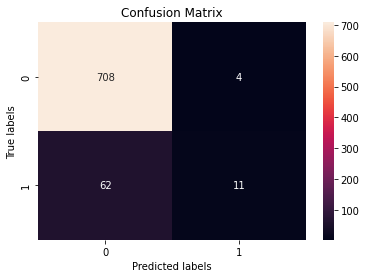

In [185]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [186]:
#Calculating the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_predictions)
print('Test Accuracy:', test_accuracy) #Average accuracy on test data


Test Accuracy: 0.9159235668789809


In [187]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_test_predictions) #class-wise evaluation of the metrics.

(array([0.91948052, 0.73333333]),
 array([0.99438202, 0.15068493]),
 array([0.95546559, 0.25      ]),
 array([712,  73]))

### ====================================================================

### **Implementing the Naive Bayes Classifier**

In [188]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train, y_train) #fit the model using the training data

GaussianNB()

**GaussianNB(priors, var_smoothing=1e-09)** command in *scikit-learn* package uses the following parameters:


*   *priors* as probabilities of the classes. (If specified the priors are not adjusted according to the data.)
*   *var_smoothing* is the portion of the largest variance of all features that is added to variances for calculation stability.

In [189]:
y_train_predicted_nb = nb_model.predict(X_train)
y_test_predicted_nb = nb_model.predict(X_test)

In [190]:
from sklearn.metrics import classification_report
train_cr = classification_report(y_train, y_train_predicted_nb)
print("Train Classification Report:")
print(train_cr)
print("=======================")
test_cr = classification_report(y_test, y_test_predicted_nb)
print("Test Classification Report:")
print(test_cr)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2842
           1       0.29      0.14      0.18       294

    accuracy                           0.89      3136
   macro avg       0.60      0.55      0.56      3136
weighted avg       0.86      0.89      0.87      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       712
           1       0.46      0.30      0.36        73

    accuracy                           0.90       785
   macro avg       0.69      0.63      0.66       785
weighted avg       0.89      0.90      0.89       785



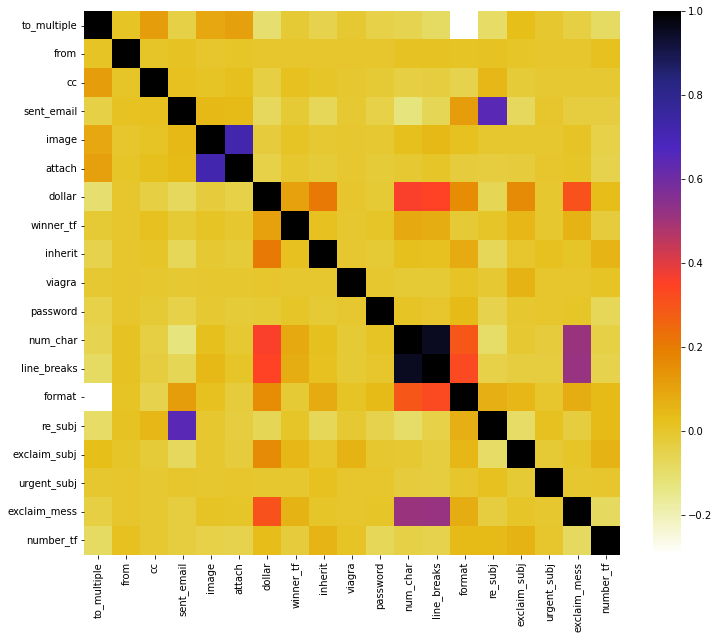

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

Analysis of the heat map suggest that not all column are correlated to each except num_char and line_breaks.
Since Naive Bayes assume that feature(x varibale column) should not be correlated. So we are just dropping the correlated column to check if model give better performance.


In [192]:
#Dropping line_breaks features from the train data

train_X_df = X_train.copy()
train_X_df= train_X_df.drop(['line_breaks'], axis=1)
train_X_df


,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,1,0,0,0,0,0,0,0,0,0,11.370,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0,1,0,0,0,0,2,0,0,0,0,1.597,0,0,1,0,3,2
3132,0,1,0,0,0,0,1,0,0,0,0,0.333,0,0,0,0,0,0
3133,0,1,0,0,0,0,0,0,0,0,0,0.332,0,0,0,0,0,2
3134,0,1,0,0,0,0,2,1,0,0,0,2.225,0,0,1,0,1,2


In [193]:
#Dropping  line_breaks features from the test data

test_X_df = X_test.copy()
test_X_df= test_X_df.drop(['line_breaks'], axis=1)
test_X_df

,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,1,0,0,0,0,0,0,0,0,0,20.133,1,0,0,0,8,2
1,0,1,0,0,0,0,0,0,0,0,0,3.796,1,0,0,0,4,2
2,0,1,0,0,0,0,0,0,0,0,0,2.705,1,0,0,0,0,1
3,0,1,4,0,0,2,0,0,0,0,0,0.537,0,0,0,0,3,2
4,0,1,0,0,0,0,0,0,0,0,0,4.174,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,1,0,0,0,0,0,0,0,0,0,31.104,1,0,0,0,3,2
781,0,1,0,0,0,0,0,0,0,0,0,30.201,1,0,0,0,3,2
782,0,1,0,0,0,0,10,0,0,0,0,74.753,1,0,0,0,27,2
783,0,1,0,0,0,0,25,0,0,0,0,16.863,1,0,0,0,3,2


In [194]:
train_X_reduced = train_X_df.to_numpy()
print(np.shape(train_X_reduced))
test_X_reduced = test_X_df.to_numpy()
print(np.shape(test_X_reduced))

(3136, 18)
(785, 18)


In [195]:
nb_reduced_model = GaussianNB()
nb_reduced_model.fit(train_X_reduced, y_train)

GaussianNB()

In [196]:
predicted_train_reduced_y = nb_reduced_model.predict(train_X_reduced)
predicted_test_reduced_y = nb_reduced_model.predict(test_X_reduced)

In [197]:
#obtaining the classification report
train_cr_reduced = classification_report(y_train, predicted_train_reduced_y)
print("Train Report (Full):")
print(train_cr)
print("Train Report (Reduced):")
print(train_cr_reduced)

Train Report (Full):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2842
           1       0.29      0.14      0.18       294

    accuracy                           0.89      3136
   macro avg       0.60      0.55      0.56      3136
weighted avg       0.86      0.89      0.87      3136

Train Report (Reduced):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2842
           1       0.29      0.11      0.16       294

    accuracy                           0.89      3136
   macro avg       0.60      0.54      0.55      3136
weighted avg       0.85      0.89      0.87      3136



In [198]:
test_cr_reduced = classification_report(y_test, predicted_test_reduced_y)
print("Test Report (Full):")
print(test_cr)
print("Test Report (Reduced):")
print(test_cr_reduced)

Test Report (Full):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       712
           1       0.46      0.30      0.36        73

    accuracy                           0.90       785
   macro avg       0.69      0.63      0.66       785
weighted avg       0.89      0.90      0.89       785

Test Report (Reduced):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       712
           1       0.38      0.18      0.24        73

    accuracy                           0.90       785
   macro avg       0.65      0.57      0.59       785
weighted avg       0.87      0.90      0.88       785



Conclusion :  Reducing the fetaure have hardly any effect on the accurary prediction.

### **=================================================================**

### **Implementing the Soft Margin SVM**

In [199]:
from sklearn.svm import LinearSVC #linear svm from scikit learn 
clf = LinearSVC(random_state=0, tol=1e-5) #max_iter=10000

In [200]:
#copy some variable for SVM perspective
train_label= y_train.copy()
train_features = X_train.copy()
test_features = X_test.copy()
test_label = y_test.copy()
num_train = n_train
num_test = n_test

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print('train_label:', train_label.shape, 'Type: ', type(train_label))
print('train_features:', train_features.shape ,'Type: ',  type(train_features))
print('test_features:', test_features.shape ,'Type: ',  type(test_features))
print('test_label:', test_label.shape,'Type: ',  type(test_label))

train_label: (3136, 1) Type:  <class 'numpy.ndarray'>
train_features: (3136, 19) Type:  <class 'numpy.ndarray'>
test_features: (785, 19) Type:  <class 'numpy.ndarray'>
test_label: (785, 1) Type:  <class 'numpy.ndarray'>


In [201]:
#Get the trained model in clf_model
train_label = np.reshape(train_label,(train_label.shape[0],))
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [202]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_labels)
# print(predicted_labels)


In [203]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('test set accuracy:', test_accuracy)    

test set accuracy: 96.17834394904459


In [204]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy
train_label = np.reshape(train_label,(num_train,1))
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the train set accuracy
print('train set accuracy:', train_accuracy)

train set accuracy: 95.74298469387755


In [205]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_label, predicted_train_labels)
print("Confusion Matrix (train set):")
print(cm_train)
cm_test = confusion_matrix(test_label, predicted_labels)
print("Confusion Matrix (test set):")
print(cm_test)

Confusion Matrix (train set):
[[2822   20]
 [ 247   47]]
Confusion Matrix (test set):
[[708   4]
 [ 56  17]]


Text(0.5, 0.98, 'Confusion Matrix')

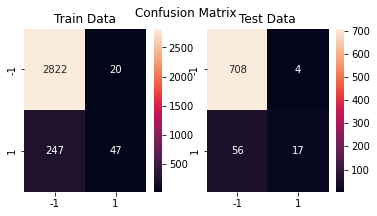

In [206]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax1, ax2 = axes
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])
ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])
fig.suptitle('Confusion Matrix')

In [207]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_label, predicted_train_labels)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_label, predicted_labels)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2842
           1       0.70      0.16      0.26       294

    accuracy                           0.91      3136
   macro avg       0.81      0.58      0.61      3136
weighted avg       0.90      0.91      0.89      3136

Test Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       712
           1       0.81      0.23      0.36        73

    accuracy                           0.92       785
   macro avg       0.87      0.61      0.66       785
weighted avg       0.92      0.92      0.90       785



### **=============================================================**

### **Implementing Descision Tree Classification**

Here we will implement the decision Tree classifier

In [208]:
#import the decision tree from scikit learn 
from sklearn import tree 

[Text(167.4, 181.2, 'X[12] <= 33.5\nentropy = 0.449\nsamples = 3136\nvalue = [2842, 294]'),
 Text(83.7, 108.72, 'X[3] <= 0.5\nentropy = 0.791\nsamples = 774\nvalue = [590, 184]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.922\nsamples = 546\nvalue = [362, 184]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 228\nvalue = [228, 0]'),
 Text(251.10000000000002, 108.72, 'X[18] <= 1.5\nentropy = 0.272\nsamples = 2362\nvalue = [2252, 110]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.548\nsamples = 497\nvalue = [434, 63]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.17\nsamples = 1865\nvalue = [1818, 47]')]

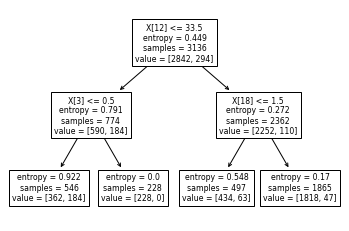

In [223]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
#train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label))  

In [224]:
#Get the trained model in clf_model
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)

In [225]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_labels)
#print(test_label)

In [226]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('test set accuracy:', test_accuracy)

test set accuracy: 95.35031847133757


In [227]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy 
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the test set accuracy 
print('train set accuracy:', train_accuracy)

train set accuracy: 95.3125


In [228]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_label, predicted_train_labels)
print("Confusion Matrix (train set):")
print(cm_train)
cm_test = confusion_matrix(test_label, predicted_labels)
print("Confusion Matrix (test set):")
print(cm_test)

Confusion Matrix (train set):
[[2842    0]
 [ 294    0]]
Confusion Matrix (test set):
[[712   0]
 [ 73   0]]


Text(0.5, 0.98, 'Confusion Matrix')

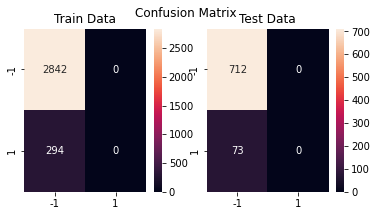

In [229]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax1, ax2 = axes
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])
ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])
fig.suptitle('Confusion Matrix')

In [230]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_label, predicted_train_labels)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_label, predicted_labels)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2842
           1       0.00      0.00      0.00       294

    accuracy                           0.91      3136
   macro avg       0.45      0.50      0.48      3136
weighted avg       0.82      0.91      0.86      3136

Test Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

### **=============================================================**

### **Implementing Random Forest Classification**